In [23]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax


from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics


#missing median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)
    

# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


np.random.seed(3)


df = pd.read_csv('data/auto-mpg.csv',na_values=['NA','?'])
df = df.reindex(np.random.permutation(df.index))

preprocess = False
if preprocess:
    encode_numeric_zscore(df, 'horsepower')
    encode_numeric_zscore(df, 'weight')
    encode_numeric_zscore(df, 'cylinders')
    encode_numeric_zscore(df, 'displacement')
    encode_numeric_zscore(df, 'acceleration')

                 
df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [24]:
df[0:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
358,31.6,4,120.0,74.0,2635,18.3,81,3,mazda 626
16,18.0,6,199.0,97.0,2774,15.5,70,1,amc hornet
292,18.5,8,360.0,150.0,3940,13.0,79,1,chrysler lebaron town @ country (sw)
81,28.0,4,97.0,92.0,2288,17.0,72,3,datsun 510 (sw)
112,19.0,4,122.0,85.0,2310,18.5,73,1,ford pinto
217,30.0,4,111.0,80.0,2155,14.8,77,1,buick opel isuzu deluxe
243,21.5,3,80.0,110.0,2720,13.5,77,3,mazda rx-4
333,32.7,6,168.0,132.0,2910,11.4,80,3,datsun 280-zx
115,15.0,8,350.0,145.0,4082,13.0,73,1,chevrolet monte carlo s
102,26.0,4,97.0,46.0,1950,21.0,73,2,volkswagen super beetle


In [25]:
df.drop('name', 1, inplace=True)
df[0:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
358,31.6,4,120.0,74.0,2635,18.3,81,3
16,18.0,6,199.0,97.0,2774,15.5,70,1
292,18.5,8,360.0,150.0,3940,13.0,79,1
81,28.0,4,97.0,92.0,2288,17.0,72,3
112,19.0,4,122.0,85.0,2310,18.5,73,1
217,30.0,4,111.0,80.0,2155,14.8,77,1
243,21.5,3,80.0,110.0,2720,13.5,77,3
333,32.7,6,168.0,132.0,2910,11.4,80,3
115,15.0,8,350.0,145.0,4082,13.0,73,1
102,26.0,4,97.0,46.0,1950,21.0,73,2


In [26]:
# remove NAN with median values for that col
missing_median(df,'horsepower')

In [27]:
X = df.iloc[:,1:8]
X[0:5]

,cylinders,displacement,horsepower,weight,acceleration,year,origin
358,4,120.0,74.0,2635,18.3,81,3
16,6,199.0,97.0,2774,15.5,70,1
292,8,360.0,150.0,3940,13.0,79,1
81,4,97.0,92.0,2288,17.0,72,3
112,4,122.0,85.0,2310,18.5,73,1


In [28]:
Y = df.iloc[:,0]
Y[0:5]

358    31.6
16     18.0
292    18.5
81     28.0
112    19.0
Name: mpg, dtype: float64

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=.2, random_state=42)

In [30]:
model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss',min_delta=0, patience=15, verbose=0, mode='auto')
model.fit(X_train,Y_train, validation_data=(X_test,Y_test), callbacks=[monitor], epochs=3000, verbose=2)


Train on 318 samples, validate on 80 samples
Epoch 1/3000
 - 1s - loss: 153793.4457 - val_loss: 27209.6258
Epoch 2/3000
 - 0s - loss: 14315.5307 - val_loss: 6235.0787
Epoch 3/3000
 - 0s - loss: 3050.7763 - val_loss: 1501.2703
Epoch 4/3000
 - 0s - loss: 890.5316 - val_loss: 477.0948
Epoch 5/3000
 - 0s - loss: 268.9242 - val_loss: 214.8055
Epoch 6/3000
 - 0s - loss: 153.5682 - val_loss: 208.1100
Epoch 7/3000
 - 0s - loss: 167.9308 - val_loss: 215.8842
Epoch 8/3000
 - 0s - loss: 167.3651 - val_loss: 207.6255
Epoch 9/3000
 - 0s - loss: 157.6179 - val_loss: 201.8876
Epoch 10/3000
 - 0s - loss: 155.0311 - val_loss: 201.0211
Epoch 11/3000
 - 0s - loss: 153.5945 - val_loss: 200.8986
Epoch 12/3000
 - 0s - loss: 153.4188 - val_loss: 200.6022
Epoch 13/3000
 - 0s - loss: 153.1176 - val_loss: 199.6818
Epoch 14/3000
 - 0s - loss: 152.5278 - val_loss: 199.2019
Epoch 15/3000
 - 0s - loss: 152.0363 - val_loss: 198.7523
Epoch 16/3000
 - 0s - loss: 151.6736 - val_loss: 198.3982
Epoch 17/3000
 - 0s - loss

Epoch 142/3000
 - 0s - loss: 73.6971 - val_loss: 94.7104
Epoch 143/3000
 - 0s - loss: 72.8667 - val_loss: 93.9809
Epoch 144/3000
 - 0s - loss: 73.0846 - val_loss: 93.1080
Epoch 145/3000
 - 0s - loss: 71.2969 - val_loss: 93.0323
Epoch 146/3000
 - 0s - loss: 70.5973 - val_loss: 91.3900
Epoch 147/3000
 - 0s - loss: 70.3498 - val_loss: 90.6445
Epoch 148/3000
 - 0s - loss: 69.8189 - val_loss: 89.8382
Epoch 149/3000
 - 0s - loss: 69.3366 - val_loss: 89.2461
Epoch 150/3000
 - 0s - loss: 69.0033 - val_loss: 88.1915
Epoch 151/3000
 - 0s - loss: 68.1417 - val_loss: 87.4565
Epoch 152/3000
 - 0s - loss: 67.5161 - val_loss: 86.6114
Epoch 153/3000
 - 0s - loss: 66.9092 - val_loss: 85.8428
Epoch 154/3000
 - 0s - loss: 66.6984 - val_loss: 85.0769
Epoch 155/3000
 - 0s - loss: 65.8646 - val_loss: 84.3457
Epoch 156/3000
 - 0s - loss: 66.9229 - val_loss: 83.6352
Epoch 157/3000
 - 0s - loss: 65.0798 - val_loss: 82.9037
Epoch 158/3000
 - 0s - loss: 66.0720 - val_loss: 82.3571
Epoch 159/3000
 - 0s - loss: 64

Epoch 286/3000
 - 0s - loss: 37.4680 - val_loss: 38.7826
Epoch 287/3000
 - 0s - loss: 37.1188 - val_loss: 38.5383
Epoch 288/3000
 - 0s - loss: 36.8555 - val_loss: 38.3620
Epoch 289/3000
 - 0s - loss: 36.7217 - val_loss: 38.3073
Epoch 290/3000
 - 0s - loss: 38.1874 - val_loss: 39.7014
Epoch 291/3000
 - 0s - loss: 36.7724 - val_loss: 38.4744
Epoch 292/3000
 - 0s - loss: 36.4587 - val_loss: 37.8197
Epoch 293/3000
 - 0s - loss: 36.2006 - val_loss: 37.7614
Epoch 294/3000
 - 0s - loss: 36.6009 - val_loss: 37.6701
Epoch 295/3000
 - 0s - loss: 37.1393 - val_loss: 38.9378
Epoch 296/3000
 - 0s - loss: 37.7256 - val_loss: 39.2675
Epoch 297/3000
 - 0s - loss: 37.7784 - val_loss: 37.0590
Epoch 298/3000
 - 0s - loss: 36.7055 - val_loss: 36.9629
Epoch 299/3000
 - 0s - loss: 36.9751 - val_loss: 38.3405
Epoch 300/3000
 - 0s - loss: 38.8833 - val_loss: 47.7891
Epoch 301/3000
 - 0s - loss: 40.8522 - val_loss: 41.8906
Epoch 302/3000
 - 0s - loss: 38.1123 - val_loss: 38.3747
Epoch 303/3000
 - 0s - loss: 34

Epoch 430/3000
 - 0s - loss: 18.8705 - val_loss: 20.7357
Epoch 431/3000
 - 0s - loss: 18.5639 - val_loss: 21.7402
Epoch 432/3000
 - 0s - loss: 18.3581 - val_loss: 20.7616
Epoch 433/3000
 - 0s - loss: 18.8675 - val_loss: 20.8016
Epoch 434/3000
 - 0s - loss: 19.2005 - val_loss: 20.5340
Epoch 435/3000
 - 0s - loss: 18.1575 - val_loss: 20.2878
Epoch 436/3000
 - 0s - loss: 18.0221 - val_loss: 20.1335
Epoch 437/3000
 - 0s - loss: 18.1270 - val_loss: 20.5478
Epoch 438/3000
 - 0s - loss: 18.8685 - val_loss: 23.0549
Epoch 439/3000
 - 0s - loss: 19.9344 - val_loss: 25.1130
Epoch 440/3000
 - 0s - loss: 17.6546 - val_loss: 19.8078
Epoch 441/3000
 - 0s - loss: 17.4766 - val_loss: 21.2003
Epoch 442/3000
 - 0s - loss: 18.5239 - val_loss: 19.7027
Epoch 443/3000
 - 0s - loss: 18.5093 - val_loss: 19.8216
Epoch 444/3000
 - 0s - loss: 17.9153 - val_loss: 20.8751
Epoch 445/3000
 - 0s - loss: 17.6278 - val_loss: 19.7743
Epoch 446/3000
 - 0s - loss: 17.9364 - val_loss: 19.3190
Epoch 447/3000
 - 0s - loss: 17

Epoch 574/3000
 - 0s - loss: 13.6753 - val_loss: 16.8127
Epoch 575/3000
 - 0s - loss: 14.3176 - val_loss: 14.9294
Epoch 576/3000
 - 0s - loss: 12.5233 - val_loss: 15.6945
Epoch 577/3000
 - 0s - loss: 12.5278 - val_loss: 15.3164
Epoch 578/3000
 - 0s - loss: 12.3313 - val_loss: 14.9965
Epoch 579/3000
 - 0s - loss: 11.9962 - val_loss: 16.0967
Epoch 580/3000
 - 0s - loss: 13.1717 - val_loss: 14.9411
Epoch 581/3000
 - 0s - loss: 12.1743 - val_loss: 14.9262
Epoch 582/3000
 - 0s - loss: 12.5551 - val_loss: 18.7093
Epoch 583/3000
 - 0s - loss: 12.6507 - val_loss: 14.8727
Epoch 584/3000
 - 0s - loss: 12.2318 - val_loss: 14.9682
Epoch 585/3000
 - 0s - loss: 12.2681 - val_loss: 14.8618
Epoch 586/3000
 - 0s - loss: 12.2840 - val_loss: 15.2942
Epoch 587/3000
 - 0s - loss: 12.0040 - val_loss: 14.9014
Epoch 588/3000
 - 0s - loss: 12.3204 - val_loss: 14.8505
Epoch 589/3000
 - 0s - loss: 12.7883 - val_loss: 14.8531
Epoch 590/3000
 - 0s - loss: 14.3743 - val_loss: 18.5387
Epoch 591/3000
 - 0s - loss: 12

In [9]:
pred = model.predict(X_test)
print("Shape: {}".format(pred.shape))
print(pred[0:5])

Shape: (80, 1)
[[28.031729]
 [21.090841]
 [30.589153]
 [25.838291]
 [21.435148]]


In [10]:
Y_test[0:5]

372    27.0
152    19.0
309    41.5
241    22.0
154    15.0
Name: mpg, dtype: float64

In [11]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 3.8821769969876536


In [12]:
m_score = metrics.mean_squared_error(pred,Y_test)
print("Final score (MSE): {}".format(m_score))

Final score (MSE): 15.071298235940077


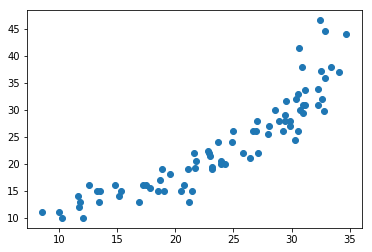

In [14]:
import matplotlib.pyplot as plt

plt.scatter(pred, Y_test)

plt.show()